## Assignment 3.2: Using Data to Improve MLB Attendance

The below will outline the use of historical Dodgers attendance based off several variables (skies, opponents, shirt, fireworks and etc) to identify and determine a recommendation to Dodger's management on how to improve attendance to their games. As for any dataset, exploratory data analysis will be utilized to do preliminary data assessments and cleaning. Since this dataset contains multiple categorical data, dummy variables will be created. 

In [92]:
# Importaing Basic Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [2]:
# Importing Dataset to Dataframe
df = pd.read_csv('dodgers-2022.csv')

In [3]:
# Top 5 rows and column headers
df.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [4]:
# Rows and Columns of dataset
df.shape

(81, 12)

In [5]:
# Data Types of columns
df.dtypes

month          object
day             int64
attend          int64
day_of_week    object
opponent       object
temp            int64
skies          object
day_night      object
cap            object
shirt          object
fireworks      object
bobblehead     object
dtype: object

In [6]:
# Statistics of numercal data
df.describe()

,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


In [8]:
# Looking for Nulls in the dataset
df.isna().sum()

month          0
day            0
attend         0
day_of_week    0
opponent       0
temp           0
skies          0
day_night      0
cap            0
shirt          0
fireworks      0
bobblehead     0
dtype: int64

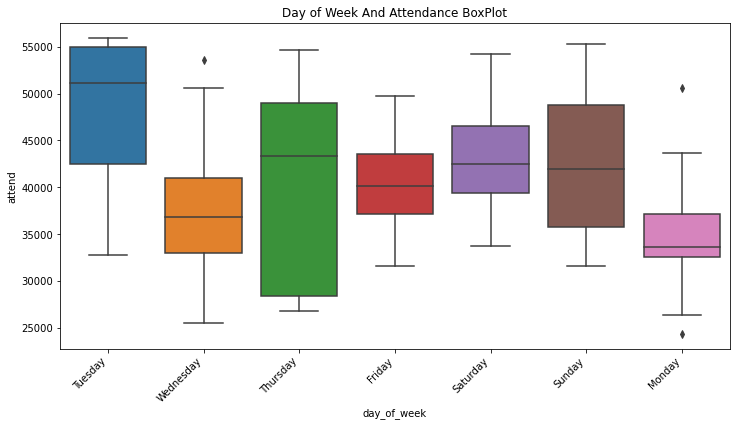

In [40]:
# Creating a BoxPlot to see distribution amongst Day of the Week and Attendance
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x = df['day_of_week'],
            y = df['attend']).set(title='Day of Week And Attendance BoxPlot')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

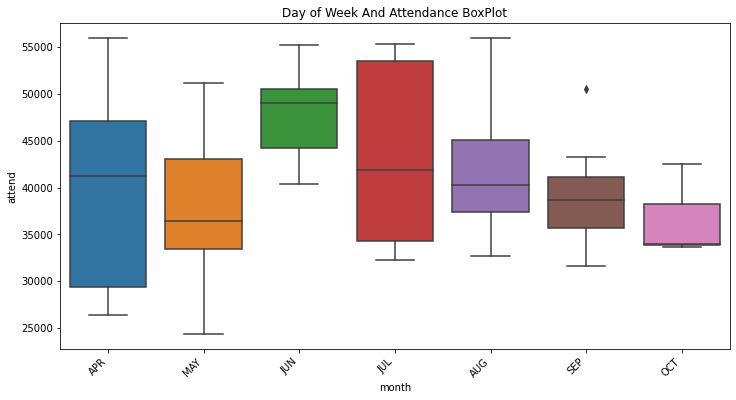

In [42]:
# Creating a BoxPlot to see distribution amongst Month and Attendance
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x = df['month'],
            y = df['attend']).set(title='Month And Attendance BoxPlot')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

The above shows a box and whisker plot of attendance with relation to the Month. June and July (Summer Months) show the highest attendance. This makes sense since those who attend have kids that are on summer vacation, and this is a great activity. April has a very high median in relation to July and this can be since the MLB season is just starting, and people are excited to go see games again after several months of hiatus. A recommendation would be to schedule more games in June and July as this will increase attendnace. 

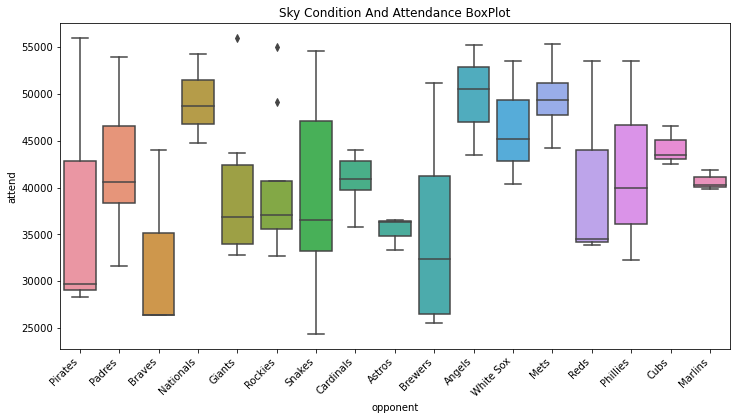

In [41]:
# Creating a BoxPlot to see distribution amongst Opponent and Attendance
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x = df['opponent'],
            y = df['attend']).set(title='Opponent And Attendance BoxPlot')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()


The above shows a boxplot of all the opponents that the Dodger's had and its attendance. It is evident that when the Angels play, there is a higher attendance rate. The reasoning of this could be that both the Angels and the Dodgers are from the exact same city, Los Angeles. This brings out the competitiveness of individuals in the same city to come out and show support to the team they favor the most. A recommendation would be to schedule more games between Angels and Dodgers. I am shock to see that the Giants don't have a great attendance rate. The reason is that in MLB, the dodgers biggest historical rival has always been the Giants. 

In [52]:
# Creating Dummy Variables for Categorical Varibles, Yes = 1 No = 0

df2 = pd.get_dummies(df, columns = ['cap', 'shirt', 'fireworks', 'bobblehead'], drop_first = True)

In [53]:
df2.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap_YES,shirt_YES,fireworks_YES,bobblehead_YES
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,0,0,0,0
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,0,0,0,0
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,0,0,0,0
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,0,0,1,0
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,0,0,0,0


The below will consist of multiple catplots in regards to free merchanise and specialty effects during the show and its attendance. 

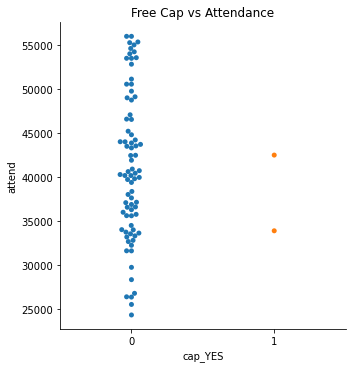

In [60]:
## Catplot + Swarm on Free Cap vs Attendance
sns.catplot(data=df2, x="cap_YES", y="attend", hue="cap_YES", kind="swarm").set(title='Free Cap vs Attendance')

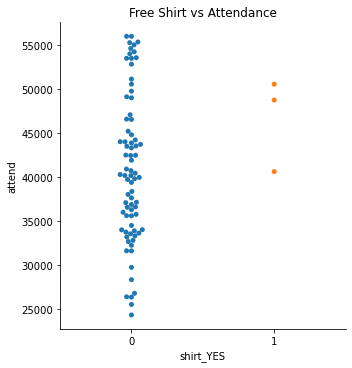

In [61]:
## Catplot + Swarm on Free Shirt vs Attendance
sns.catplot(data=df2, x="shirt_YES", y="attend", hue="shirt_YES", kind="swarm").set(title='Free Shirt vs Attendance')

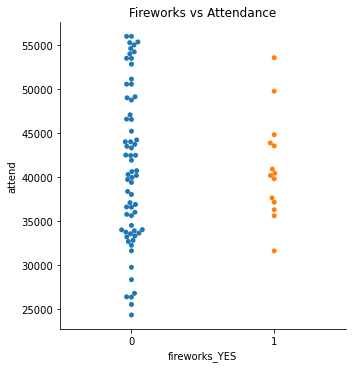

In [62]:
## Catplot + Swarm on Fireworks vs Attendance
sns.catplot(data=df2, x="fireworks_YES", y="attend", hue="fireworks_YES", kind="swarm").set(title='Fireworks vs Attendance')

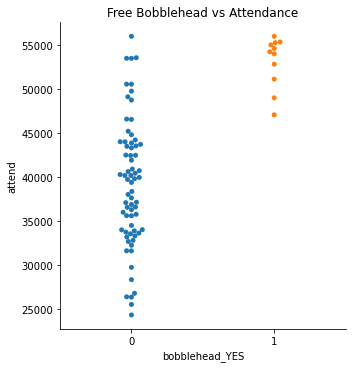

In [63]:
## Catplot + Swarm on Free Bobblehead vs Attendance
sns.catplot(data=df2, x="bobblehead_YES", y="attend", hue="bobblehead_YES", kind="swarm").set(title='Free Bobblehead vs Attendance')

For perspective of the above, anything with a 0 means No and 1 means Yes. The above shows four cat plot with swarm feature and its attendance for each variable. The free cap and free shirt plots are both statistically very low regarding when they are given thus any assumptions cannot be made. When fireworks are done during a post-game show, the distribution seems to be very neutral and again can be utilized to determine if more shows would increase attendance. However, whenever a free bobblehead is given during the game, attendance falls in the top 25% in comparison to when it is not given. Fans tends to go to games a lot more often when bobbleheads are given. 

In [65]:
# Creating Linear Regression Model
model = LinearRegression()

In [ ]:
# Identifying Variables
x = df2['bobblehead_YES']

In [66]:
df2

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap_YES,shirt_YES,fireworks_YES,bobblehead_YES
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,0,0,0,0
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,0,0,0,0
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,0,0,0,0
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,0,0,1,0
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,0,0,0,0
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,0,0,0,0
78,OCT,1,33624,Monday,Giants,86,Clear,Night,0,0,0,0
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,0,0,0,0


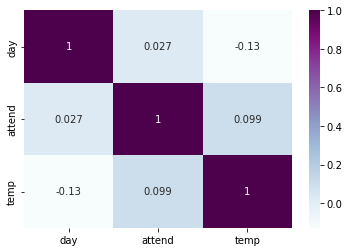

In [46]:
## Correlation amongst numerical variables -- outcome --> not much significance
df2_corr = df2.iloc[:,:11]
correlation_mat = df_corr.corr()
sns.heatmap(correlation_mat, cmap="BuPu", annot = True)
plt.show()

In [86]:
from statistics import mean
mean_of_bobblehead = df2[df2['bobblehead_YES'] == 1] 
print(mean_of_bobblehead['attend'].mean())

## Mean of Bobblehead  = 53,145.

print(df2['attend'].mean())

## Mean of Overall = 41,040. 

53144.63636363636
41040.07407407407


In [81]:
df2.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap_YES,shirt_YES,fireworks_YES,bobblehead_YES
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,0,0,0,0
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,0,0,0,0
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,0,0,0,0
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,0,0,1,0
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,0,0,0,0


In [95]:
X = df2[['cap_YES', 'shirt_YES', 'fireworks_YES', 'bobblehead_YES']]
y = df2['attend']

In [96]:
regr = linear_model.LinearRegression()

In [97]:
regr.fit(X, y)

LinearRegression()

In [100]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 38201.07843137255
Coefficients: 
 [-1.15784314e+01  8.44258824e+03  2.87677871e+03  1.49435579e+04]


In [101]:
x = sm.add_constant(x) # adding a constant

C:\Users\qvant\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [102]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     12.01
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           1.29e-07
Time:                        14:08:16   Log-Likelihood:                -825.51
No. Observations:                  81   AIC:                             1661.
Df Residuals:                      76   BIC:                             1673.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            3.82e+04    933.092     40.

There are some variables that I found that can increase attendance at Dodger games. The first few visuals that I created where box plots. These box plot shows that Tuesday + April, June and July has the highest median and if not attendance for those games. This suggests that we should schedule more games on this day and month. When I created a box plot of the opposing team that the Dodgers are facing, I noticed that the Dodgers stadium attendance are highest when they are facing the Angels. However, based off my major league baseball knowledge, this are all pre-determined dates and opponents thus we can’t really change much. The next key factor to investigate other variables such as free merchandise or stadium special effects. When I created cat plots of the swarm feature, I noticed that when bobbleheads were given away for free, attendance increased dramatically when no bobbleheads were given away. You can see this on the last to 2nd visual. When looking at the overall mean of attendance, it was a little over 12,000 more individuals who attended. The next step was to run a linear regression model on multiple variables to see if we can see any statistical abnormalities. When we run the coefficient, bobble_head_YES has the highest coefficient meaning as the variable increases, the attendance variable will also increase. 